# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answer**: How does the ridership change with time of the day? 
In which locations is ridership the maxiumum?
What age group uses this system the maximum?

> **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.

In [2]:
import csv
from datetime import datetime 
from pprint import pprint 
import calendar

def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.

    """
    duration = 0.0
    if(city == 'Washington'):
        duration = int(datum.get('Duration (ms)'))/(1000*60)
    else:
        duration = int(datum.get('tripduration'))/60
   
    return round(duration,4)



def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    """
    date = 0
    if(city == 'Washington'):
        date =  datetime.strptime(datum.get('Start date'), "%m/%d/%Y %H:%M")
    elif(city == 'Chicago'):
        date = datetime.strptime(datum.get('starttime'), "%m/%d/%Y %H:%M")
    else:
        date = datetime.strptime(datum.get('starttime'), "%m/%d/%Y %H:%M:%S")
    
    return (date.month, date.hour, calendar.day_name[date.date().weekday()])

def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    """
    
    user_type = ""
    if(city == 'Washington'):
        user_type = datum.get('Member Type')
        if(user_type == 'Registered'):
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    else:
        user_type = datum.get('usertype')
    
    return user_type

def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.

    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            duration = duration_in_mins(row, city)
            timeoftrip = time_of_trip(row, city)
            usertype = type_of_user(row, city)
            new_point = {}
            new_point['duration'] = duration
            new_point['month'] = timeoftrip[0]
            new_point['hour'] = timeoftrip[1]
            new_point['day_of_week'] = timeoftrip[2]
            new_point['user_type'] = usertype
            trip_writer.writerow(new_point)
            
            

# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)

   

Yes
Yes
Yes


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: Replace this text with your response!

In [1]:
import csv

def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)


chicago_list = number_of_trips('./data/Chicago-2016-Summary.csv')
summary_list = number_of_trips('./data/NYC-2016-Summary.csv')
washington_list = number_of_trips('./data/Washington-2016-Summary.csv')
city_list = ['Chicago','NYC','Washington']
subscibers_list = [chicago_list[0],summary_list[0],washington_list[0]]
customers_list = [chicago_list[1],summary_list[1],washington_list[1]]
total_list = [chicago_list[2],summary_list[2],washington_list[2]]

sub_customer_prop = [chicago_list[0]//chicago_list[1],summary_list[0]//summary_list[1],washington_list[0]//washington_list[1]]

print("highest number of trips:"+city_list[total_list.index(max(total_list))])
print("highest number of customers trips:"+city_list[sub_customer_prop.index(min(sub_customer_prop))])
print("highest number of subscibers trips:"+city_list[sub_customer_prop.index(max(sub_customer_prop))])

data_file = './examples/BayArea-Y3-Summary.csv'
print(number_of_trips(data_file))


highest number of trips:NYC
highest number of customers trips:Chicago
highest number of subscibers trips:NYC
(5666, 633, 6299)


In [7]:
 
# > **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

# Now, you will write your own code to continue investigating properties of the data.

# **Question 4b**: Bike-share systems are designed for riders to take short trips.
#Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges,
#with overage charges made for trips of longer than that duration. What is the average trip length for each city? 
#What proportion of rides made in each city are longer than 30 minutes?

# **Answer**: Replace this text with your reponse!
    
def average_trip_duration(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_total_all_durations = 0
        n_total_no_durations = 0
        n_total_no_above_30 = 0
        
        # tally up ride types
        for row in reader:
            duration = float(row['duration'])
            n_total_all_durations = n_total_all_durations+duration
            
            if(duration>30):
                n_total_no_above_30+=1
                
            n_total_no_durations+=1
        
        average_duration = round(n_total_all_durations/n_total_no_durations,4)
        
        perc_above_30 = round((n_total_no_above_30/n_total_no_durations)*100,4)
        
        # return tallies as a tuple
        return(average_duration,perc_above_30)
    
chicago_list = average_trip_duration('./data/Chicago-2016-Summary.csv')
print("Chicago:- "+"average trip length: "+str(chicago_list[0])+" proportion of rides longer than 30 minutes: "+str(chicago_list[1]))
nyc_list = average_trip_duration('./data/NYC-2016-Summary.csv')
print("NYC:- "+"average trip length: "+str(nyc_list[0])+" proportion of rides longer than 30 minutes: "+str(nyc_list[1]))
washington_list = average_trip_duration('./data/Washington-2016-Summary.csv')
print("Washington:- "+"average trip length: "+str(washington_list[0])+" proportion of rides longer than 30 minutes: "+str(washington_list[1]))



Chicago:- average trip length: 16.5636 proportion of rides longer than 30 minutes: 8.3321
NYC:- average trip length: 15.8126 proportion of rides longer than 30 minutes: 7.3024
Washington:- average trip length: 18.9329 proportion of rides longer than 30 minutes: 10.8389


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Replace this text with your response!

In [18]:
def calculate_rides_user_types(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        n_total_subscribers = 0
        n_total_customers = 0
        n_subscribers_duration = 0
        n_customers_duration = 0
        
        # tally up ride types
        for row in reader:
            duration = float(row['duration'])
            if row['user_type'] == 'Subscriber':
                n_total_subscribers+=1
                n_subscribers_duration = n_subscribers_duration+duration
            else:
                n_total_customers+=1
                n_customers_duration = n_customers_duration+duration
            
        
        average_duration_subscribers = round((n_subscribers_duration/n_total_subscribers),4)
        
        average_duration_customers = round((n_customers_duration/n_total_customers),4)
        
        # return tallies as a tuple
        if average_duration_subscribers>average_duration_customers:
            return "Subscribers"
        else:
            return "Customers"
        
print("Longer rides taken by "+calculate_rides_user_types('./data/NYC-2016-Summary.csv'))



Longer rides taken by Customers


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

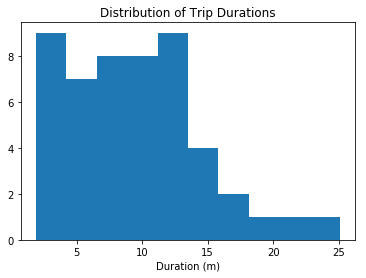

In [2]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

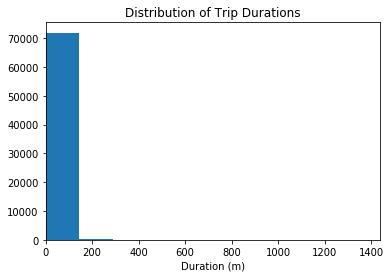

In [31]:
def plot_duration(filename):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        duration_list = []
        
        # tally up ride types
        for row in reader:
            duration = float(row['duration'])
            duration_list.append(duration)
            
        %matplotlib inline 
        plt.hist(duration_list)
        plt.title('Distribution of Trip Durations')
        plt.xlabel('Duration (m)')
        plt.show()

plot_duration('./data/NYC-2016-Summary.csv')

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: Replace this text with your response!

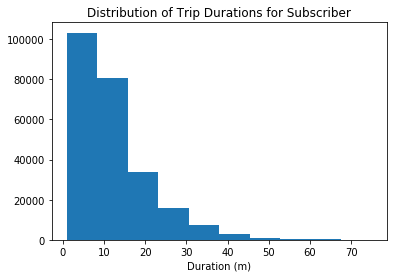

Peak of distribution for Subscriber: 103199.0


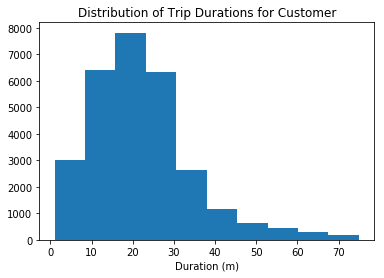

Peak of distribution for Customer: 7812.0


In [6]:

def plot_duration_usertype(filename,usertype):
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        duration_list = []
        
        # tally up ride types
        for row in reader:
            duration = float(row['duration'])
            if duration<75 and row['user_type']==usertype:
                duration_list.append(duration)
#         print(max(duration_list))
        %matplotlib inline 
        y, x, _ = plt.hist(duration_list)
        plt.title('Distribution of Trip Durations for '+usertype)
        plt.xlabel('Duration (m)')
#         plt.gca().set_ylim([0,max(duration_list)])
        plt.show()
        
        return max(y)

peakS = plot_duration_usertype('./data/NYC-2016-Summary.csv','Subscriber')
print("Peak of distribution for Subscriber: "+str(peakS.max()))

peakC = plot_duration_usertype('./data/NYC-2016-Summary.csv','Customer')
print("Peak of distribution for Customer: "+str(peakC.max()))



In [ ]:
# Shape of  subsciber distribution : Its a unimodal distribution along x and y.positive skew.Tail on the right is fatter than tail on the left.
#as the right tail is longer, the distribution is right skewed.
#Shape of  customer distribution : Its a unimodal distribution along x and y.positive skew.Tail on the right is fatter than tail on the left.
#as the right tail is longer, the distribution is right skewed.

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: Show ridership for all the 3 cities based on month

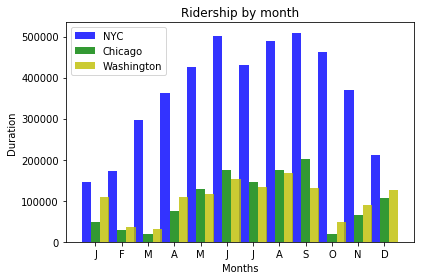

In [37]:
import csv
import calendar
import matplotlib.pyplot as plt
import numpy as np
def month_ridership(filename,roler):
    """
    This function plots the ridership throughtout the year month wise
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        month_ridership = {}
        month_ridership_list = []
        
        
        # tally up ride types
        for row in reader:
            month = row['month']
            duration = float(row['duration'])
                
            role = row['user_type']
            if role == roler:
                if month_ridership.get(month) is not None:
                    month_ridership[month] = month_ridership.get(month)+duration
                else:
                    month_ridership[month] = duration
            else:
                if month_ridership.get(month) is not None:
                    month_ridership[month] = month_ridership.get(month)+duration
                else:
                    month_ridership[month] = duration
                
        for key,value in month_ridership.items():
            month_ridership_list.append(value)
            
        return month_ridership_list
            
       
        
max_min_mont_list_nyc = month_ridership('./data/NYC-2016-Summary.csv','')      
max_min_mont_list_chicago = month_ridership('./data/Chicago-2016-Summary.csv','') 
max_min_mont_list_washington = month_ridership('./data/Washington-2016-Summary.csv','') 

n_groups = 12
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
 
rects1 = plt.bar(index, max_min_mont_list_nyc, bar_width,
                 alpha=opacity,
                 color='b',
                 label='NYC')
 
rects2 = plt.bar(index + bar_width, max_min_mont_list_chicago, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Chicago')

rects2 = plt.bar(index + 2*bar_width, max_min_mont_list_washington, bar_width,
                 alpha=opacity,
                 color='y',
                 label='Washington')
 
plt.xlabel('Months')
plt.ylabel('Duration')
plt.title('Ridership by month')
plt.xticks(index + bar_width, ('J', 'F', 'M', 'A', 'M','J','J','A','S','O','N','D'))
plt.legend()
 
plt.tight_layout()
plt.show()


# max_min_mont_list_nyc_sub = month_ridership('./data/NYC-2016-Summary.csv','Subscriber')
# max_min_mont_list_nyc_cus = month_ridership('./data/NYC-2016-Summary.csv','Customer')

# n_groups = 12
# fig, ax = plt.subplots()
# index = np.arange(n_groups)
# bar_width = 0.35
# opacity = 0.8
 
# rects1 = plt.bar(index, max_min_mont_list_nyc_sub, bar_width,
#                  alpha=opacity,
#                  color='b',
#                  label='Subscriber')
 
# rects2 = plt.bar(index + bar_width, max_min_mont_list_nyc_cus, bar_width,
#                  alpha=opacity,
#                  color='g',
#                  label='Customer')
 
# plt.xlabel('Months')
# plt.ylabel('Duration')
# plt.title('Ridership by usertype for NYC')
# plt.xticks(index + bar_width, ('J', 'F', 'M', 'A', 'M','J','J','A','S','O','N','D'))
# plt.legend()
 
# plt.tight_layout()
# plt.show()

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: Investigate the performance of stocks/mutual funds for certain companies over a period of time

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0